# Credit Card Application

Banks and financial institutions often need to predict customer behavior, such as the likelihood of a customer accepting a loan offer, to target their marketing efforts effectively. This helps in increasing the acceptance rate of their offers while reducing marketing costs.

Our objective is to create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized, and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

We import necessary libraries to handle data manipulation, visualization, and model building. These libraries provide functions to simplify complex operations, ensuring efficient data processing and analysis.

# Grading Scheme:

1. **Importing Libraries and Data (10 points)**
   - Correctly import all required libraries; remove any unncessary libraries: 5 points
   - Correctly read the dataset: 5 points

2. **Data Exploration (20 points)**
   - Correctly display dimensions, first and last entries: 10 points
   - Correctly display descriptive statistics: 10 points

3. **Handling Missing Values (20 points)**
   - Correctly impute missing numeric values: 10 points
   - Correctly impute missing non-numeric values: 10 points

4. **Data Pre-processing (20 points)**
   - Correctly encode non-numeric data: 10 points
   - Correctly plot histograms and heatmap: 10 points

5. **Model Building (30 points)**
   - Correctly split data into train and test sets: 10 points
   - Correctly scale the data: 10 points
   - Correctly build and fit the logistic regression model: 10 points

6. **Model Evaluation (30 points)**
   - Correctly calculate and display confusion matrix: 10 points
   - Correctly calculate and plot the ROC curve: 20 points
 
7. **Answering Red Questions**
   - Correctly answer all subjective questions in red: 20 points


Total: 150 points

## 1. Importing Libraries

In [16]:
# KEEP ONLY THE REQUIRED LIBRARIES; REMOVE OTHERS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import pyLDAvis
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

## <span style="color:red">*Q1. Why only the required libraries are kept in the code?*</span>

Because with only the required libraries, code runs more efficiently, consumes less memory, and is easier to understand.

## 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [20]:

# READ DATA
# <Your code here>  
data = pd.read_excel('Approval.xlsx')

data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


**Instructions:**
1. Get the dimensions of the array and print them.
2. Verify if the correct dataset was imported by checking the first 15 entries.
3. Verify by checking the last five entries.
4. Display descriptive statistics of the dataset.

In [22]:
# GETTING THE DIMENSIONS OF THE ARRAY
# <Your code here>
dimensions = data.shape
print(dimensions)

(690, 16)


In [23]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
# <Your code here>
first15 = data.head(15)
print(first15)

    Gender    Age    Debt  Married  BankCustomer               Industry  \
0        1  30.83   0.000        1             1            Industrials   
1        0  58.67   4.460        1             1              Materials   
2        0  24.50   0.500        1             1              Materials   
3        1  27.83   1.540        1             1            Industrials   
4        1  20.17   5.625        1             1            Industrials   
5        1  32.08   4.000        1             1  CommunicationServices   
6        1  33.17   1.040        1             1              Transport   
7        0  22.92  11.585        1             1  InformationTechnology   
8        1  54.42   0.500        0             0             Financials   
9        1  42.50   4.915        0             0            Industrials   
10       1  22.08   0.830        1             1                 Energy   
11       1  29.92   1.835        1             1                 Energy   
12       0  38.25   6.000

In [24]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
# <Your code here>
last5 = data.tail(5)
print(last5)

     Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
685           1.25             0         0            0               0   
686           2.00             0         1            2               1   
687           2.00             0         1            1               1   
688           0.04             0         0            0               0   
689           8.29             0         0            0               1   

     Citizen  ZipCode  Income  Approved  
685  ByBirth      260     

In [25]:
# DESCRIPTIVE STATS
# <Your code here>
dstats = data.info()
print(dstats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None


In [26]:
# DESCRIPTIVE STATS
# <Your code here>
print(data)

     Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Emplo

## 3) Handling Missing Values

Missing values in the dataset can lead to incorrect analysis and model predictions. Imputing missing values ensures the integrity of the dataset, making it possible to build reliable models.

**Instructions:**
1. Check for missing values.
2. Impute missing values for numeric data using the mean and for non-numeric data using the mode.

In [29]:
# CHECK FOR MISSING VALUES
# <Your code here>
missingValues = data.isnull().sum()
print(missingValues)

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [30]:
# IMPUTE MISSING VALUES

# for numeric data using mean
# <Your code here>
columnsN = data.select_dtypes(include=['float64', 'int64']).columns
data[columnsN] = data[columnsN].fillna(data[columnsN].mean())

In [31]:
# For non numeric data using mode
# <Your code here>
columnsNN = data.select_dtypes(exclude=['float64', 'int64']).columns
for column in columnsNN:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

In [32]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## <span style="color:red">*Q2. Is there any missing data at all?*</span>

No, we can tell that there is no missing data from the the printed missing values, which gives 0 for all columns.

## <span style="color:red">*Q3. Why do we impute mean for numeric and mode for non-numeric data?*</span>

We do this because it is the method to fill missing values with the central tendency, which will make it so the data maintains its overall distribution.

## 4) Data Preprocessing

Data preprocessing is crucial for preparing raw data for analysis. Converting non-numeric data to numeric forms, such as one-hot encoding, ensures compatibility with machine learning algorithms, which typically require numerical input.

In [56]:
# CONVERTING ALL NON-NUMERIC DATA TO NUMERIC - USING ONE-HOT ENCODING

# INSTANTIATE LABELENCODER
ohe = OneHotEncoder(sparse=False)

# USE LABEL ENCODER le TO TRANSFORM VARIABLES

# Creating a new DataFrame for storing transformed data
data_transformed = pd.DataFrame()

for column in data.columns:
    if data[column].dtypes == 'object':
        # One-hot encode the column if it's object type
        # <Your code here>
        encodedColumn = ohe.fit_transform(data[[column]])
        # Set the column name of one-hot encoded DataFrame as column_value
        # <Your code here>
        encodedData = pd.DataFrame(encodedColumn, columns=[f"{column}_{i}" for i in range(encodedColumn.shape[1])])
        # <Your code here>
        data_transformed = pd.concat([data_transformed, encodedData], axis=1)
    else:
        # If not object type, just copy the data
        # <Your code here>
        data_transformed[column] = data[column]

data = data_transformed

data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry_0,Industry_1,Industry_2,Industry_3,Industry_4,...,PriorDefault,Employed,CreditScore,DriversLicense,Citizen_0,Citizen_1,Citizen_2,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1.0,0.0,0.0,202,0,1
1,0,58.67,4.460,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,6,0,1.0,0.0,0.0,43,560,1
2,0,24.50,0.500,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,280,824,1
3,1,27.83,1.540,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,5,1,1.0,0.0,0.0,100,3,1
4,1,20.17,5.625,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.0,1.0,0.0,120,0,1
5,1,32.08,4.000,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,360,0,1
6,1,33.17,1.040,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,164,31285,1
7,0,22.92,11.585,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,80,1349,1
8,1,54.42,0.500,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,180,314,1
9,1,42.50,4.915,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,52,1442,1


## 5) Data Visualization

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

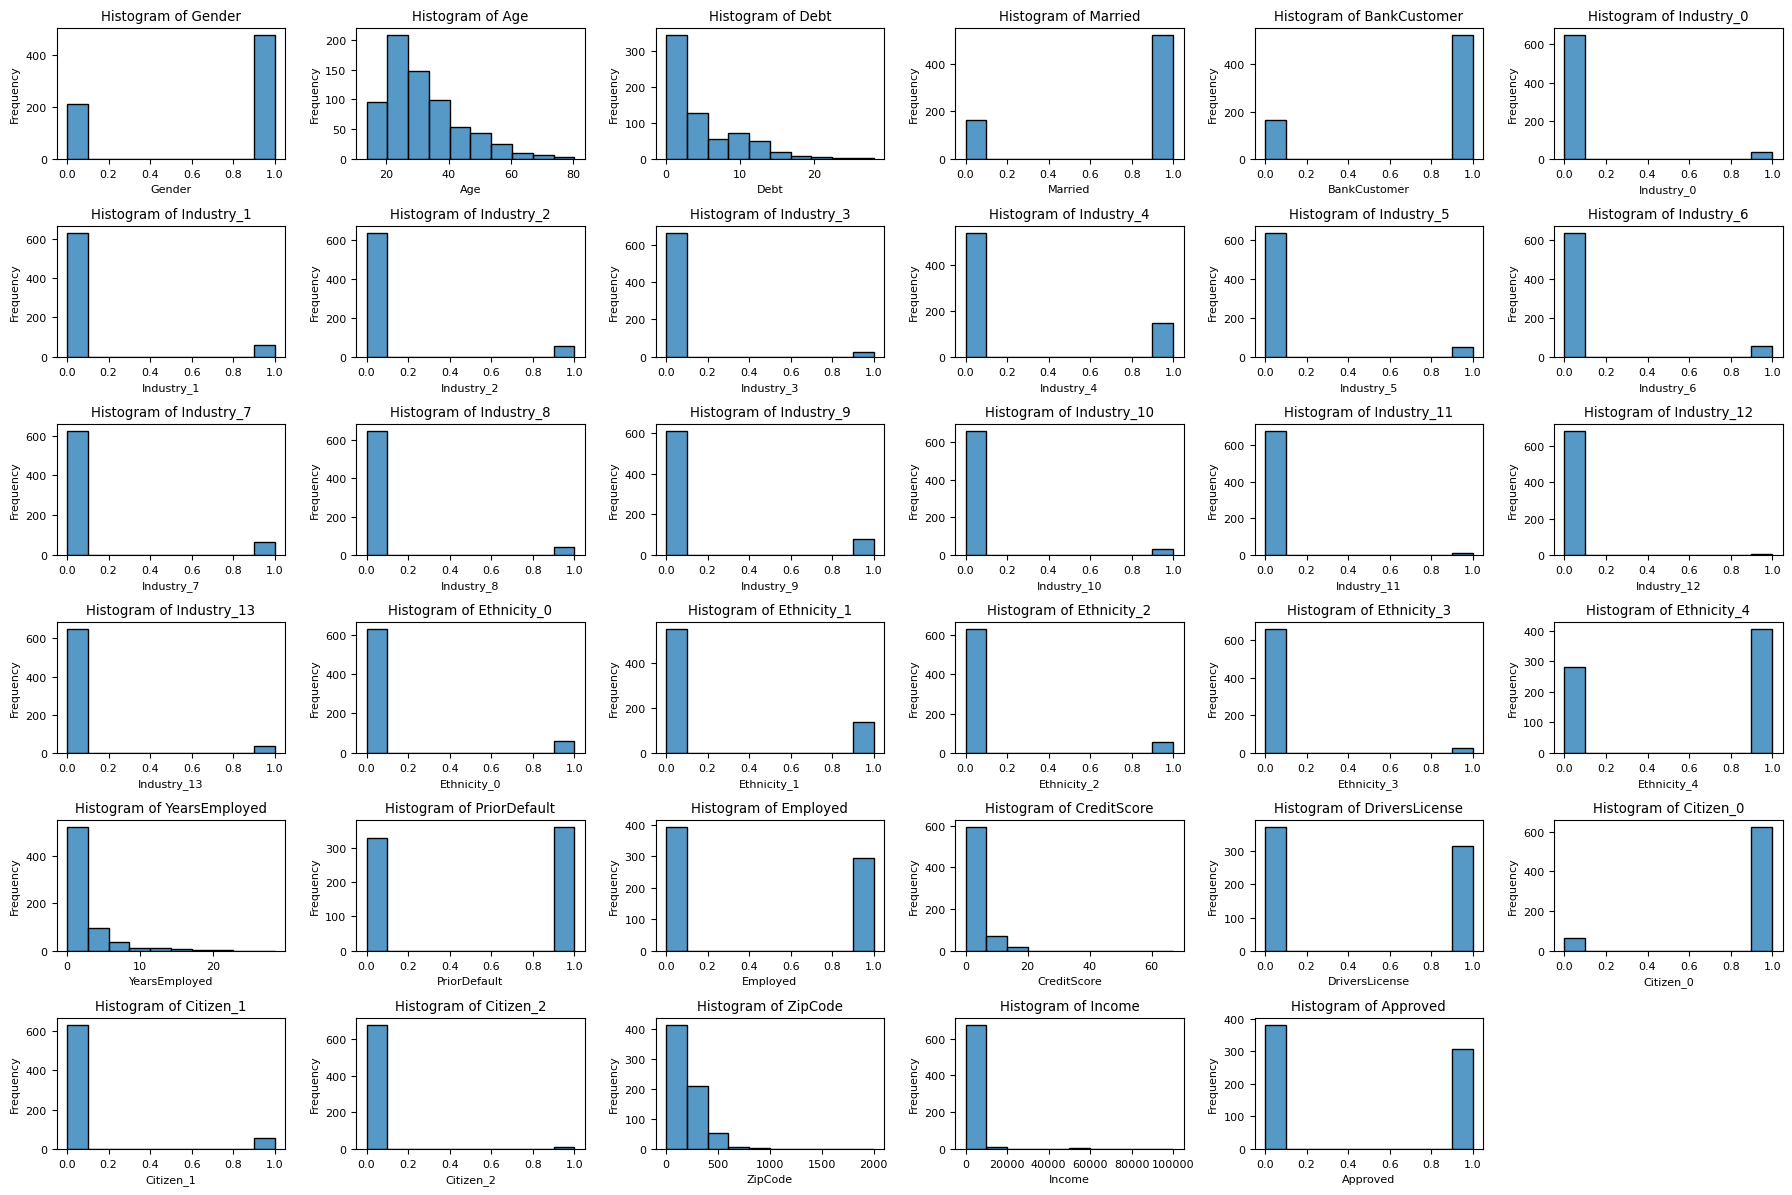

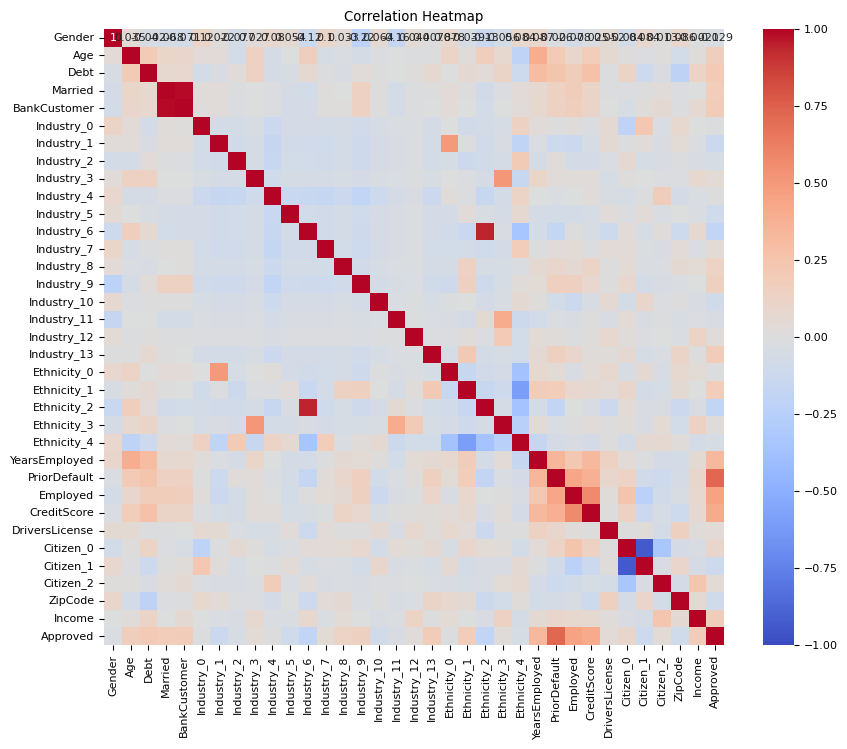

In [81]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
# <Your code here>
plt.figure(figsize=(18, 12))
for i, column in enumerate(data.columns, 1):
    plt.subplot((len(data.columns) //6) + 1, 6, i)
    sns.histplot(data[column], kde=False, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
# CALCULATE THE CORRELATION MATRIX
# <Your code here>
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
# Decrease font size
plt.rcParams['font.size'] = 8

# PLOT THE HEATMAP
# <Your code here>


## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

Most of the histograms are either 1 or 0 for the categorical variables, or a decreasing histogram for numerical.

## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>

The matrix and heatmap can reveal strong correlations between variables admist all the variable relations.

## 6) Model Building

Model building involves training a machine learning model to make predictions based on historical data. In this case, we are predicting the likelihood of a credit card application being approved. Splitting the data into training and testing sets ensures that we can evaluate the model's performance on unseen data, providing a realistic assessment of its accuracy.

In [45]:
# DROP THE VARIABLES NOT NEEDED
# <Your code here>


# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
# <Your code here>

# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()
# <Your code here>

**Instructions:**
1. Scale the data using MinMaxScaler to ensure that all features contribute equally to the model. Scaling is important as it brings all features to a comparable range, improving the convergence of the learning algorithm.
2. Instantiate and fit a Logistic Regression model to the training set.

In [47]:
# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
# <Your code here>

# You can try to do z-score normalization (look it up!)
# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
# <Your code here>


# FIT MODEL TO THE TRAIN SET
# <Your code here>

In [48]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

## <span style="color:red">*Q6. Why is it important to split the data into training and testing sets?*</span>

## 7) Model Evaluation

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [51]:
from sklearn.metrics import confusion_matrix

y_pred = # <Your code here>

# print("Accuracy of logistic regression classifier: ", logreg.score(* <Your code here> *))

# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL
# <Your code here>


SyntaxError: invalid syntax (3499782046.py, line 3)

**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

In [ ]:
import sklearn.metrics as metrics

# CALCULATE THE FPR AND TPR FOR ALL THRESHOLDS OF THE CLASSIFICATION
# <Your code here>

# method to plot ROC Curve
# <Your code here>